In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Dhaka Rent.xlsx')

In [3]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
df.head(2)

,area,rent
0,2000,31500
1,2100,35000


In [5]:
df.tail(3)

,area,rent
57,1800,25100
58,2200,31560
59,3100,51600


In [6]:
df2 = pd.read_csv('Dhaka Rent.csv')

In [7]:
df2.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [8]:
df.shape

(60, 2)

In [9]:
df.isnull().sum()

area    0
rent    0
dtype: int64

In [10]:
#df.isnull()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


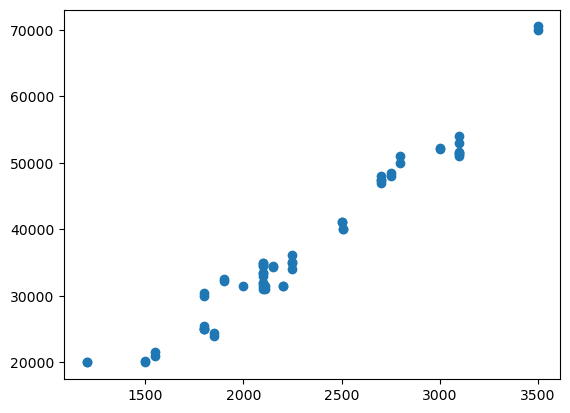

In [12]:
plt.scatter(df.area, df.rent)

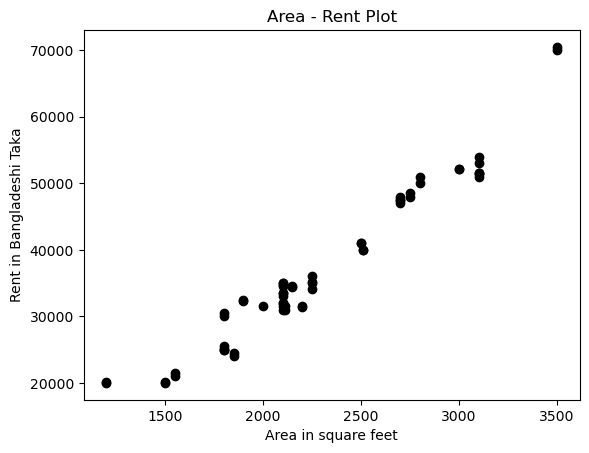

In [13]:
plt.scatter(df.area, df.rent, color='black')
plt.xlabel('Area in square feet')
plt.ylabel('Rent in Bangladeshi Taka')
plt.title('Area - Rent Plot')
plt.savefig('img1.png')

In [14]:
df.area.mean()

2289.0

In [15]:
df.rent.mean()

37269.166666666664

In [16]:
x = df[['area']] # x = df.drop('rent', axis=1)

In [17]:
y = df[['rent']] # y = df.drop('area', axis=1)

In [18]:
y.head() #

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


In [19]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


# Sep data into train and test

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.30, random_state=1) #train_size=.70

In [22]:
xtrain.head()

,area
52,3500
19,2700
42,2100
56,2750
17,1550


In [23]:
ytrain.head()

,rent
52,70500
19,47000
42,34700
56,48500
17,21000


In [24]:
xtrain.shape

(42, 1)

In [25]:
#xtrain.to_csv('train_x.csv')

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
reg = LinearRegression() # creating object for linear regression 

In [28]:
reg.fit(xtrain, ytrain) # training the maodel using training data

LinearRegression()

In [29]:
reg.coef_ #m

array([[21.71038918]])

In [30]:
reg.intercept_ #c

array([-12534.95598546])

In [31]:
reg.predict([[4000]])

array([[74306.60071651]])

In [32]:
reg.predict([[3000]])

array([[52596.21154101]])

In [34]:
#y = m*x+c
result = ((reg.coef_) * 3000) + (reg.intercept_)
result

array([[52596.21154101]])

In [35]:
xtest.head()

,area
39,2100
41,2100
2,2500
48,1800
50,2110


In [36]:
xtest.shape

(18, 1)

In [37]:
reg.predict(xtest)

array([[33056.86128307],
       [33056.86128307],
       [41741.01695327],
       [26543.74453042],
       [33273.96517483],
       [36313.4196594 ],
       [36313.4196594 ],
       [28714.78344797],
       [34142.38074185],
       [26543.74453042],
       [48254.13370592],
       [13517.51102513],
       [26543.74453042],
       [36313.4196594 ],
       [47168.61424714],
       [20030.62777778],
       [33056.86128307],
       [34142.38074185]])

In [38]:
pred = reg.predict(xtest)

In [39]:
pred

array([[33056.86128307],
       [33056.86128307],
       [41741.01695327],
       [26543.74453042],
       [33273.96517483],
       [36313.4196594 ],
       [36313.4196594 ],
       [28714.78344797],
       [34142.38074185],
       [26543.74453042],
       [48254.13370592],
       [13517.51102513],
       [26543.74453042],
       [36313.4196594 ],
       [47168.61424714],
       [20030.62777778],
       [33056.86128307],
       [34142.38074185]])

In [40]:
reg.score(xtrain, ytrain) #training accuracy

0.9515633925067878

In [41]:
reg.score(xtest, ytest) #testing accuracy

0.9174928490312289

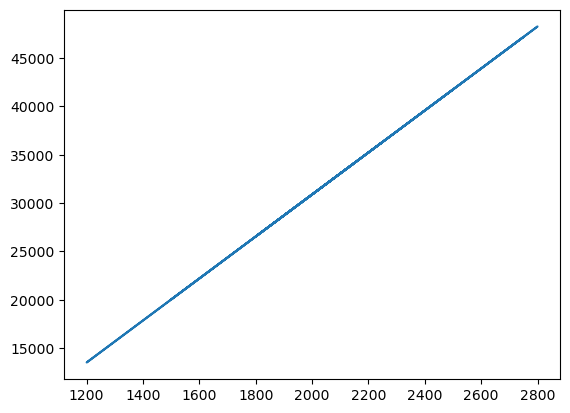

In [42]:
plt.plot(xtest, reg.predict(xtest)) # predicted_ytest = reg.predict(xtest)

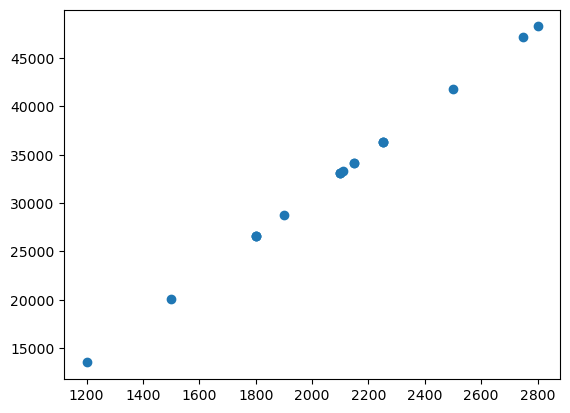

In [43]:
plt.scatter(xtest, reg.predict(xtest)) # predicted_ytest = reg.predict(xtest)

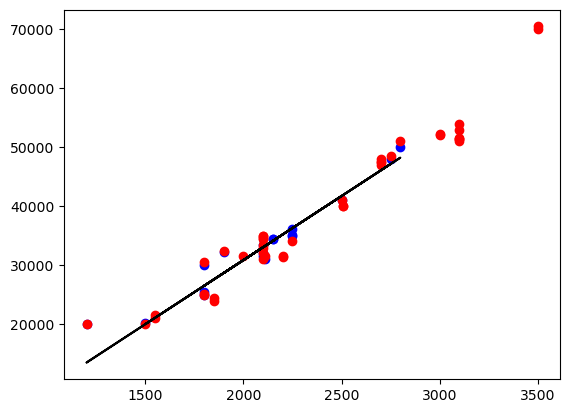

In [44]:
plt.plot(xtest, reg.predict(xtest), color='black') # predicted_ytest = reg.predict(xtest)
plt.scatter(xtest, ytest, color='blue') # actual testing values
plt.scatter(xtrain, ytrain, color='red') # actual training data

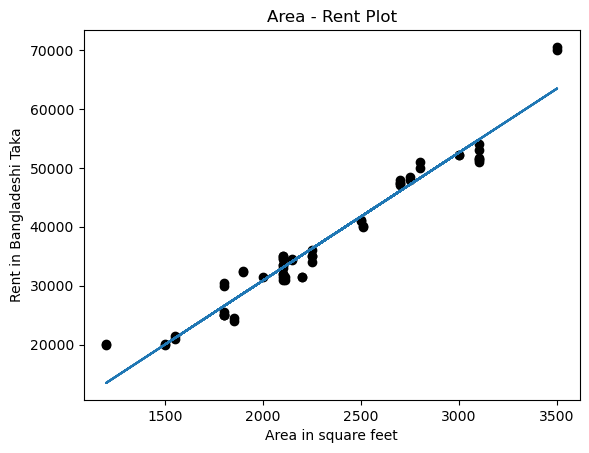

In [45]:
plt.plot(df.area, reg.predict(df[['area']]))
# x axis = area
# y axis = predicted rent

plt.scatter(df.area, df.rent, color='black')
plt.xlabel('Area in square feet')
plt.ylabel('Rent in Bangladeshi Taka')
plt.title('Area - Rent Plot')
plt.savefig('img1.png')

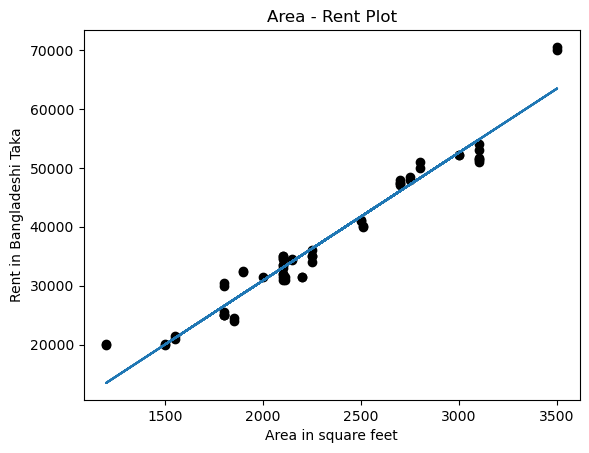

In [46]:
plt.plot(df.area.squeeze(), reg.predict(df[['area']]))
# x axis = area
# y axis = predicted rent

plt.scatter(df.area, df.rent, color='black')
plt.xlabel('Area in square feet')
plt.ylabel('Rent in Bangladeshi Taka')
plt.title('Area - Rent Plot')
plt.savefig('img1.png')

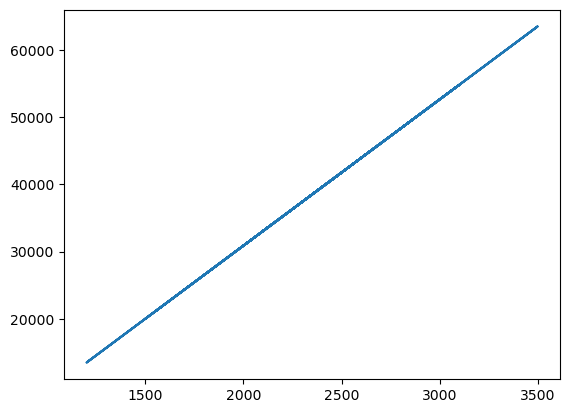

In [47]:
plt.plot(df.area.squeeze(), reg.predict(df[['area']]))

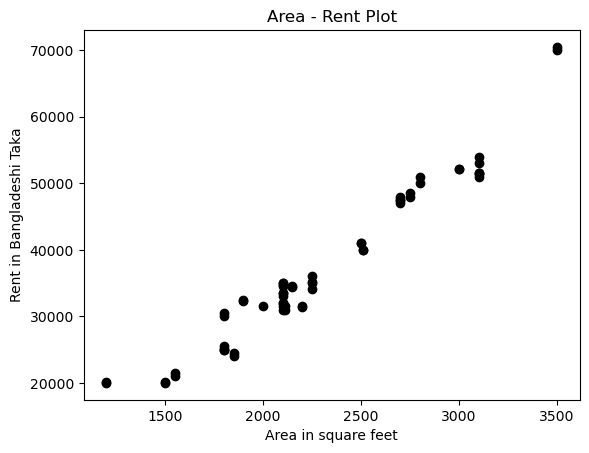

In [48]:
plt.scatter(df.area, df.rent, color='black')
plt.xlabel('Area in square feet')
plt.ylabel('Rent in Bangladeshi Taka')
plt.title('Area - Rent Plot')
plt.savefig('img1.png')

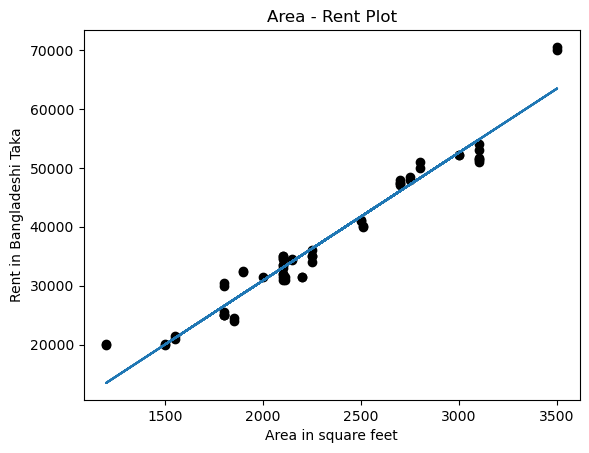

In [49]:
plt.plot(df.area.squeeze(), reg.predict(df[['area']]))
# x axis = area
# y axis = predicted rent

plt.scatter(df.area, df.rent, color='black')
plt.xlabel('Area in square feet')
plt.ylabel('Rent in Bangladeshi Taka')
plt.title('Area - Rent Plot')
plt.savefig('img1.png')

In [50]:
reg.score(x,y) #training sccuracy

0.9497963746066767

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [52]:
# actual - predicted
mean_squared_error(ytest, reg.predict(xtest))

4897227.04659725

In [54]:
mean_absolute_error(ytest, reg.predict(xtest)) # actual - predicted

1573.0786240082562

In [55]:
reg.predict([[5500]])

array([[106872.18447975]])

In [ ]:
#knn , svm

# SAVE ML Models

In [56]:
import pickle as pk
import joblib

In [57]:
pk.dump(reg, open('my_lr1', 'wb')) # write binary

In [58]:
reg2 = pk.load(open('my_lr1', 'rb')) # read binary

In [60]:
reg2.predict([[3000]])
#52596.21154101

array([[52596.21154101]])

In [61]:
#another way
joblib.dump(reg, 'my_lr3')

['my_lr3']

In [62]:
reg3 = joblib.load('my_lr3')

In [63]:
reg3.predict([[3000]])

array([[52596.21154101]])